#

## Medias Moviles

$$ y_t = \mu + \epsilon_t + \theta_1\epsilon_{t-1}+ \ldots +\theta_q\epsilon_{t-q}$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("./Datos/Index2018.csv")
df["date"]=pd.to_datetime(df["date"],format="%d/%m/%Y")
df.set_index("date",inplace=True)
df=df.asfreq('b')
df=df.fillna(method='ffill')

In [5]:
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [6]:
df1=df[["nikkei"]]

In [9]:
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats.distributions import chi2

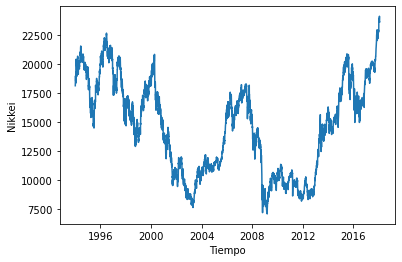

In [11]:
fig, ax = plt.subplots()
ax.plot(df1["nikkei"])
ax.set_xlabel('Tiempo')
ax.set_ylabel('Nikkei')
plt.show();

In [12]:
from statsmodels.tsa.stattools import adfuller

In [15]:
adfuller(df1.nikkei)

(-1.332381058320325,
 0.6142308566436258,
 1,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 83856.80978763242)

In [16]:
primera_diferencia=np.diff(df.nikkei,n=1)

In [17]:
adfuller(primera_diferencia)

(-83.45520517840112,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 83844.26621588689)

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

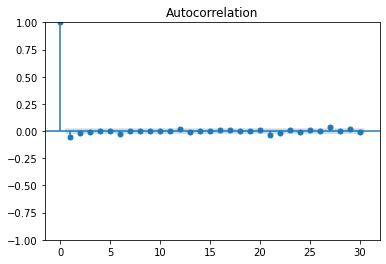

In [20]:
plot_acf(primera_diferencia,lags=30);

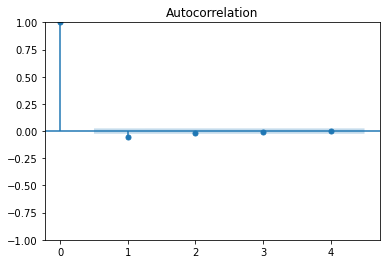

In [21]:
plot_acf(primera_diferencia,lags=4);

Hemos encontrado que es un Ma de tipo con q=1

In [23]:
df_diferencia=pd.DataFrame({'primera_diferencia':primera_diferencia})

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error

> Estudiar el sMAPE que el simetrico de media absoluta porcentual


In [30]:
df_diferencia.isnull().sum()

primera_diferencia    0
dtype: int64

In [32]:
Train=df_diferencia[:int(0.9*len(df_diferencia))]
Test=df_diferencia[int(0.9*len(df_diferencia)):]

In [ ]:
Train

In [35]:
Modelo=SARIMAX(Train[Train.columns[0]], order=(0,0,1))

In [39]:
resultado=Modelo.fit()

In [40]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     primera_diferencia   No. Observations:                 5648
Model:               SARIMAX(0, 0, 1)   Log Likelihood              -37900.287
Date:                Fri, 13 Oct 2023   AIC                          75804.575
Time:                        19:21:33   BIC                          75817.853
Sample:                             0   HQIC                         75809.200
                               - 5648                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0453      0.010     -4.529      0.000      -0.065      -0.026
sigma2      3.944e+04    428.295     92.083      0.000    3.86e+04    4.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3848.60
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                            -0.21
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.02
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [60]:
predicciones=resultado.get_prediction(1,5)

In [61]:
predicciones.predicted_mean

1   -14.448606
2    -2.549932
3   -14.104351
4     9.179101
5   -17.552751
Name: predicted_mean, dtype: float64

In [48]:
Test.iloc[:10]

,primera_diferencia
5648,86.99
5649,-390.23
5650,68.31
5651,-433.39
5652,1343.43
5653,-470.89
5654,-35.40
5655,-298.52
5656,60.78
5657,145.12


In [53]:
len(Test)

628

In [54]:
len(predicciones.predicted_mean)

629

In [62]:
mean_absolute_error(Test.primera_diferencia.iloc[:len(predicciones.predicted_mean)],predicciones.predicted_mean)

475.0169753356243

In [63]:
mean_squared_error(Test.primera_diferencia.iloc[:len(predicciones.predicted_mean)],predicciones.predicted_mean)

443103.8416644527

In [64]:
mean_absolute_percentage_error(Test.primera_diferencia.iloc[:len(predicciones.predicted_mean)],predicciones.predicted_mean)

1.0800563258883529

## ARMA

$$y_t + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \ldots+ \phi_p y_{t-p}= \mu + \epsilon_1 +\ldots $$